<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/MNISTClassificatoinSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
data = datasets.load_digits()


In [ ]:
type(data)

sklearn.utils._bunch.Bunch

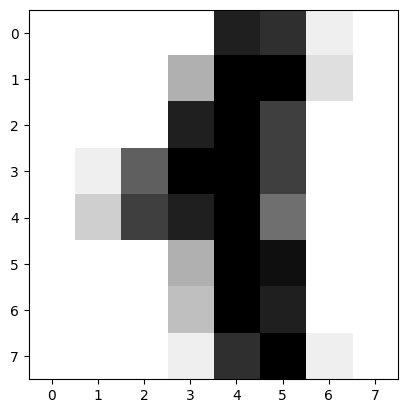

In [ ]:
plt.subplot()
plt.imshow(data.images[11], cmap=plt.cm.gray_r)

In [ ]:
data.target[11]

1

In [ ]:
counter=0
dict1=dict()
nums=data.target
nums=set(nums)
print(nums)
for i in range(len(data.images)):
  if data.target[i]==0:
     counter+=1
dict1[0]=counter
print (dict1)



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0: 178}


In [ ]:
# counet=0
dict2=dict()
nums=data.target
nums=set(nums)
nums=list(nums)
# print(nums)
for i in nums:
  count=0
  for j in range(len(data.images)):
    if  data.target[j]==i:
      count+=1
  dict2[i]=count
print(dict2)

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [ ]:
images_and_labels = list(zip(data.images, data.target))

In [ ]:
images_and_labels[110]

(array([[ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
        [ 0.,  0., 11., 15.,  3.,  0.,  0.,  0.],
        [ 0.,  7., 15.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 12., 11.,  1.,  3.,  8.,  2.,  0.],
        [ 0.,  4., 12., 15., 15., 16.,  9.,  0.],
        [ 0.,  0.,  0.,  8., 16.,  8.,  2.,  0.],
        [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]]),
 4)

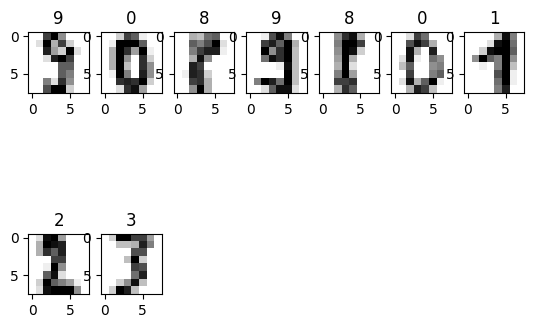

In [ ]:
for i, (image, label) in enumerate(images_and_labels[125:134]):
    plt.subplot(2, 7, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [ ]:
np.shape(data.images)

(1797, 8, 8)

In [ ]:

len(data.images)

1797

In [ ]:
X = data.images.reshape((len(data.images), -1))

In [ ]:
np.shape(X)

(1797, 64)

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y = data.target

In [ ]:
len(y)

1797

In [ ]:
from sklearn.svm import SVC
SVC

sklearn.svm._classes.SVC

In [ ]:
svm_classifier = SVC()
#SVC() is Constractor of SVC class

In [ ]:
svm_classifier.fit(X, y)

SVC()

Text(0.5, 1.0, '1')

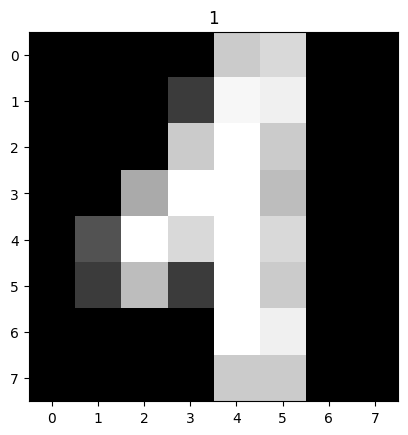

In [ ]:
plt.subplot()
plt.imshow(data.images[200], cmap=plt.cm.Greys_r)
plt.title(data.target[200])

In [ ]:
svm_classifier.predict([X[200]])

array([1])

In [ ]:
Train_mount=int(len(data.images)*.76)
Train_mount

1365

In [ ]:
Test_mount=len(data.images)-Train_mount
Test_mount

432

In [ ]:
svm_new = SVC()
svm_new.fit(X[:Train_mount], y[:Train_mount])

SVC()

In [ ]:
pridcted_image=svm_new.predict(X[Train_mount:])

In [ ]:
Real_image=y[Train_mount:]

In [ ]:
correct_val=0
for i in range(Test_mount):
  if pridcted_image[i]==Real_image[i]:
    correct_val+=1
print ((correct_val/Test_mount)*100)

95.13888888888889


In [ ]:
for i in range(1,100):
  corrected_val_list=list()
  prc=i/100
  # print (prc)
  Train_mount=int(len(data.images)*prc)
  Test_mount=len(data.images)-Train_mount
  svm_new = SVC()
  svm_new.fit(X[:Train_mount], y[:Train_mount])
  pridcted_image=svm_new.predict(X[Train_mount:])
  Real_image=y[Train_mount:]
  correct_val=0
  for j in range(Test_mount):
    if pridcted_image[j]==Real_image[j]:
      correct_val+=1
  corrected_val_list[i]=((correct_val/Test_mount)*100)


IndexError: ignored

In [ ]:
print(corrected_val_list)

[100.0]


In [ ]:
7.886754297269969
6.488156539649846
8.394543546694647
9.946524064171124
12.104689203925844

In [ ]:
svm_new.predict([X[948]])

array([7])

In [ ]:
data.target[9]

2

In [ ]:
from sklearn import metrics

In [ ]:
pridect_val = svm_new.predict(X[1000:])
real_val = y[1000:]
print(metrics.classification_report(real_val, pridect_val))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        79
           1       0.77      0.75      0.76        80
           2       0.66      0.79      0.72        77
           3       0.38      0.87      0.53        79
           4       0.94      0.92      0.93        83
           5       0.35      0.80      0.49        82
           6       0.88      0.96      0.92        80
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00        76
           9       0.00      0.00      0.00        81

    accuracy                           0.61       797
   macro avg       0.48      0.61      0.52       797
weighted avg       0.48      0.61      0.53       797



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.confusion_matrix(real_val, pridect_val))

[[76  0  0  0  3  0  0  0  0  0]
 [ 0 60  3  1  0  6 10  0  0  0]
 [ 1  0 61 11  0  4  0  0  0  0]
 [ 0  5  1 69  0  4  0  0  0  0]
 [ 0  0  1  0 76  6  0  0  0  0]
 [ 2  0  0 13  0 66  1  0  0  0]
 [ 3  0  0  0  0  0 77  0  0  0]
 [ 1  5 19  5  2 48  0  0  0  0]
 [ 1  8  8 21  0 38  0  0  0  0]
 [ 5  0  0 61  0 15  0  0  0  0]]
